# KPMG Virtual Internship Analysis 

`Sprocket Central Pty Ltd` , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months


## Task 1: Data Quality Assesment
- Review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

## Task 2: Data Insight 
- Performing the 3 phases as such: Data Exploration, Model Development, Data Interpretation. Then presenting the analysis using PowerPoint that includes the detail approach for strategy behind each of 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

# Importing Library 

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

# Read Files by Sheets

In [2]:
transactions = pd.read_excel('KPMG.xlsx', sheet_name='Transactions')
demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')
address = pd.read_excel('KPMG.xlsx', sheet_name='CustomerAddress')

C:\Users\WIN - 10\AppData\Local\Temp\ipykernel_16880\2926470321.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel('KPMG.xlsx', sheet_name='CustomerDemographic')


In [3]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [16]:
demographic.drop(33, inplace=True)

In [17]:
demographic['DOB'].sort_values(ascending=True)

719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
657    1944-01-24
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 3999, dtype: datetime64[ns]

Our `DOB` values has set to it's correct timeframe. 

In [18]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  default     

<br>

# Task 2

## Phase 1: Data Exploration

In [19]:
demographic.drop('default', axis=1, inplace=True)

In [20]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


## Handling Missing Data

In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [22]:
transactions.dropna(axis=0, inplace=True)

In [23]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [24]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3343 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  owns_car    

In [25]:
demographic.dropna(axis=0, inplace=True)

In [26]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2779 non-null   int64         
 1   first_name                           2779 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2779 non-null   object        
 4   past_3_years_bike_related_purchases  2779 non-null   int64         
 5   DOB                                  2779 non-null   datetime64[ns]
 6   job_title                            2779 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       2779 non-null   object        
 9   deceased_indicator                   2779 non-null   object        
 10  owns_car    

## Understanding Data Distribution

In [27]:
def count_values_in_columns(dataframe, columns):
    
    counts = {}
    for column in columns:
        counts[column] = dataframe[column].value_counts()
    return counts

columns_to_count = ['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']

value_counts_dict = count_values_in_columns(demographic, columns_to_count)

for column, counts_series in value_counts_dict.items():
    print(f"Value Counts for '{column}':")
    print(counts_series, end="\n\n")

Value Counts for 'gender':
Female    1444
Male      1333
F            1
Femal        1
Name: gender, dtype: int64

Value Counts for 'job_industry_category':
Manufacturing         670
Financial Services    661
Health                529
Retail                297
Property              229
IT                    123
Entertainment         116
Argiculture            97
Telecommunications     57
Name: job_industry_category, dtype: int64

Value Counts for 'wealth_segment':
Mass Customer        1384
High Net Worth        710
Affluent Customer     685
Name: wealth_segment, dtype: int64

Value Counts for 'deceased_indicator':
N    2777
Y       2
Name: deceased_indicator, dtype: int64

Value Counts for 'owns_car':
Yes    1421
No     1358
Name: owns_car, dtype: int64



In [28]:
demographic['gender'] = (np.where(
    (demographic['gender'] == 'F') | 
    (demographic['gender'] == 'Femal'), 'Female', demographic['gender']))

In [29]:
demographic['gender'].value_counts()

Female    1446
Male      1333
Name: gender, dtype: int64

In [30]:
demographic['deceased_indicator'] = np.where(demographic['deceased_indicator'] == 'N', 'No', demographic['deceased_indicator'])

In [31]:
demographic['deceased_indicator'] = np.where(demographic['deceased_indicator'] == 'Y', 'Yes', demographic['deceased_indicator'])

In [32]:
demographic['deceased_indicator'].value_counts()

No     2777
Yes       2
Name: deceased_indicator, dtype: int64

## Demographic Plot

### Categorical Columns

In [33]:
def count_values_in_columns(dataframe, columns):
    
    counts = {}
    for column in columns:
        counts[column] = dataframe[column].value_counts()
    return counts

columns_to_count = ['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']

value_counts_dict = count_values_in_columns(demographic, columns_to_count)

for column, counts_series in value_counts_dict.items():
    print(f"Value Counts for '{column}':")
    print(counts_series, end="\n\n")

Value Counts for 'gender':
Female    1446
Male      1333
Name: gender, dtype: int64

Value Counts for 'job_industry_category':
Manufacturing         670
Financial Services    661
Health                529
Retail                297
Property              229
IT                    123
Entertainment         116
Argiculture            97
Telecommunications     57
Name: job_industry_category, dtype: int64

Value Counts for 'wealth_segment':
Mass Customer        1384
High Net Worth        710
Affluent Customer     685
Name: wealth_segment, dtype: int64

Value Counts for 'deceased_indicator':
No     2777
Yes       2
Name: deceased_indicator, dtype: int64

Value Counts for 'owns_car':
Yes    1421
No     1358
Name: owns_car, dtype: int64



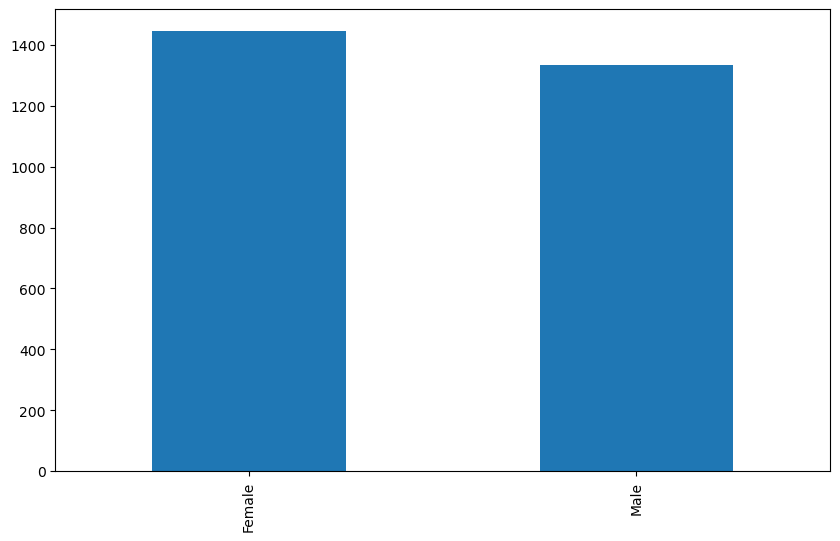

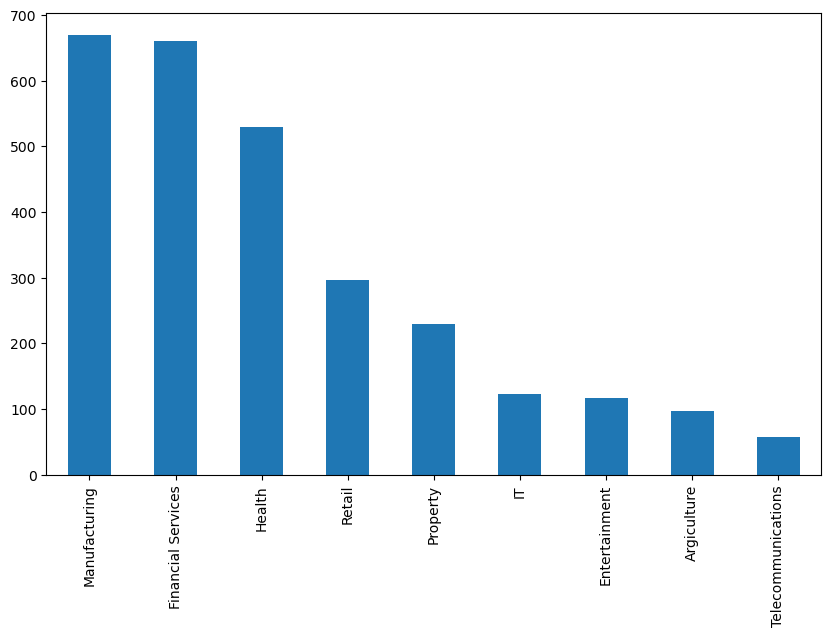

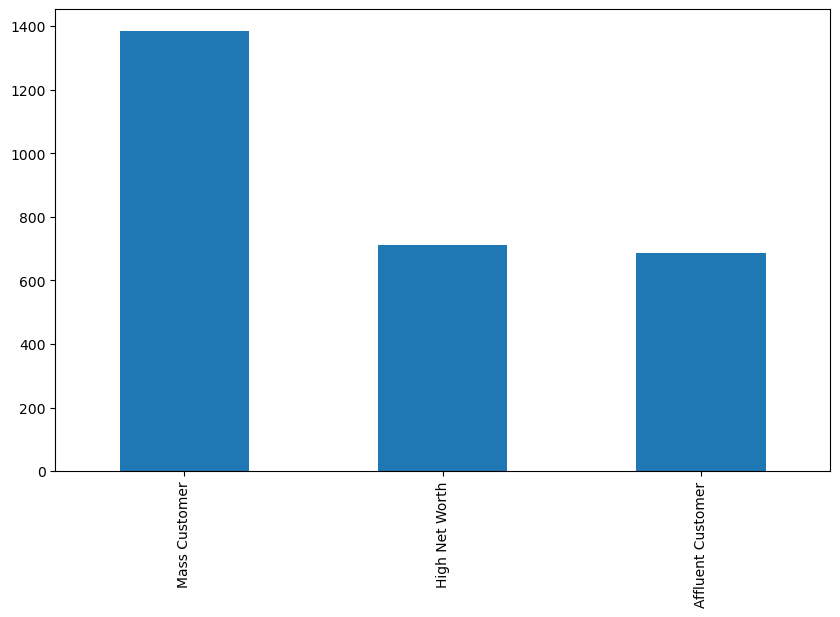

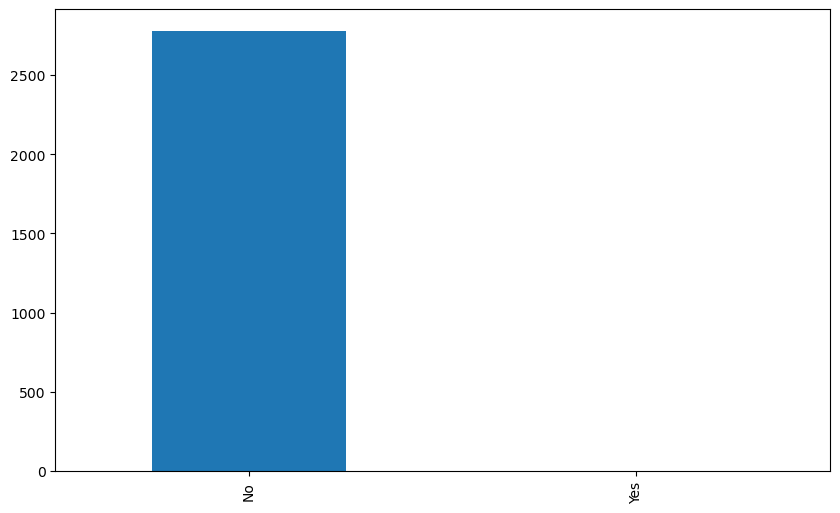

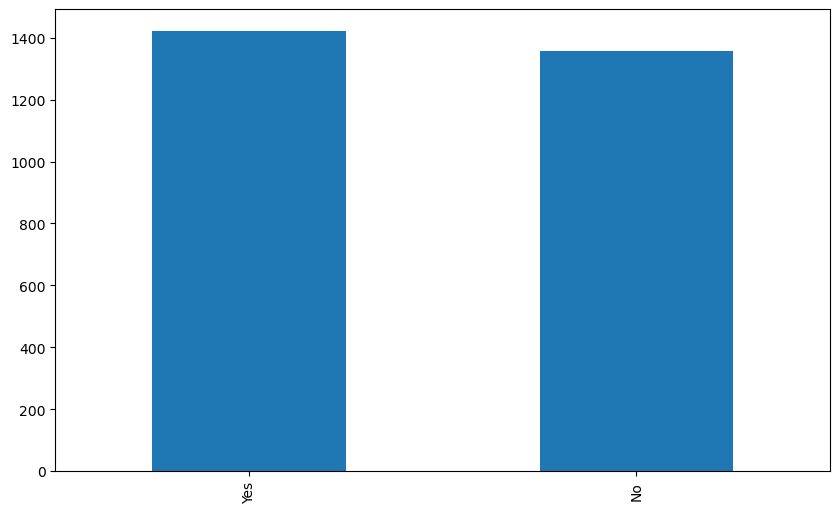

In [34]:
def plot_bar_chart(data, column):
    
    value_counts = data[column].value_counts()
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    
    plt.show()
    
columns_to_plot = ['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']

for column in columns_to_plot:
    plot_bar_chart(demographic, column)

### Numerical Column

In [35]:
demographic['tenure'].value_counts().sort_index()

1.0     115
2.0     106
3.0     119
4.0     126
5.0     163
6.0     139
7.0     161
8.0     151
9.0     143
10.0    152
11.0    155
12.0    160
13.0    131
14.0    146
15.0    113
16.0    159
17.0    121
18.0    150
19.0    115
20.0     70
21.0     43
22.0     41
Name: tenure, dtype: int64

<Axes: ylabel='Frequency'>

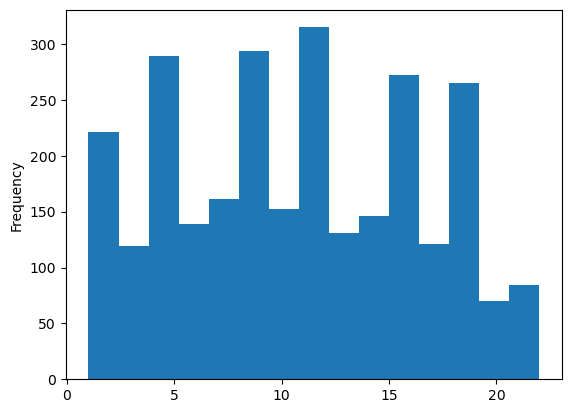

In [36]:
demographic['tenure'].plot(kind='hist', bins=15)

## Transactions Plot

### Categorical Columns

In [37]:
def count_values_in_columns(dataframe, columns):
    
    counts = {}
    for column in columns:
        counts[column] = dataframe[column].value_counts()
    return counts

columns_to_count = ['order_status', 'brand', 'product_line', 'product_class', 'product_size']

value_counts_dict = count_values_in_columns(transactions, columns_to_count)

for column, counts_series in value_counts_dict.items():
    print(f"Value Counts for '{column}':")
    print(counts_series, end="\n\n")

Value Counts for 'order_status':
Approved     19273
Cancelled      172
Name: order_status, dtype: int64

Value Counts for 'brand':
Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

Value Counts for 'product_line':
Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

Value Counts for 'product_class':
medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

Value Counts for 'product_size':
medium    12767
large      3900
small      2778
Name: product_size, dtype: int64



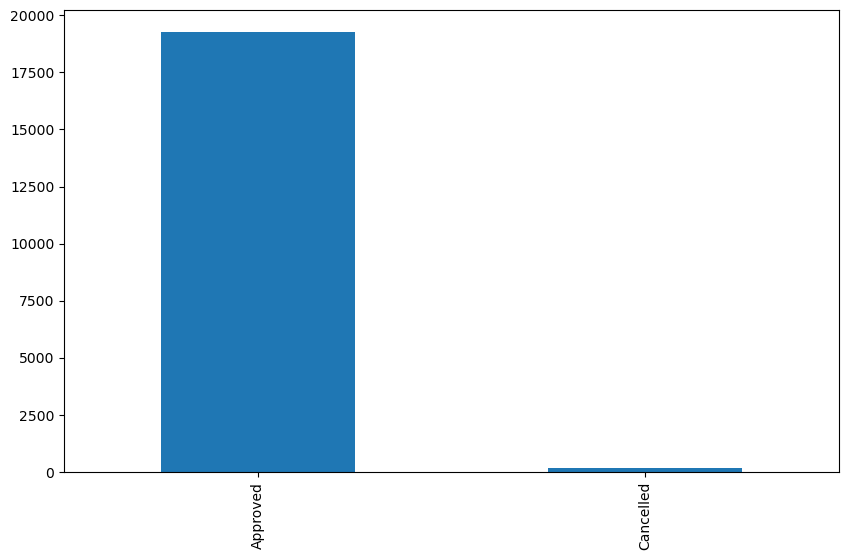

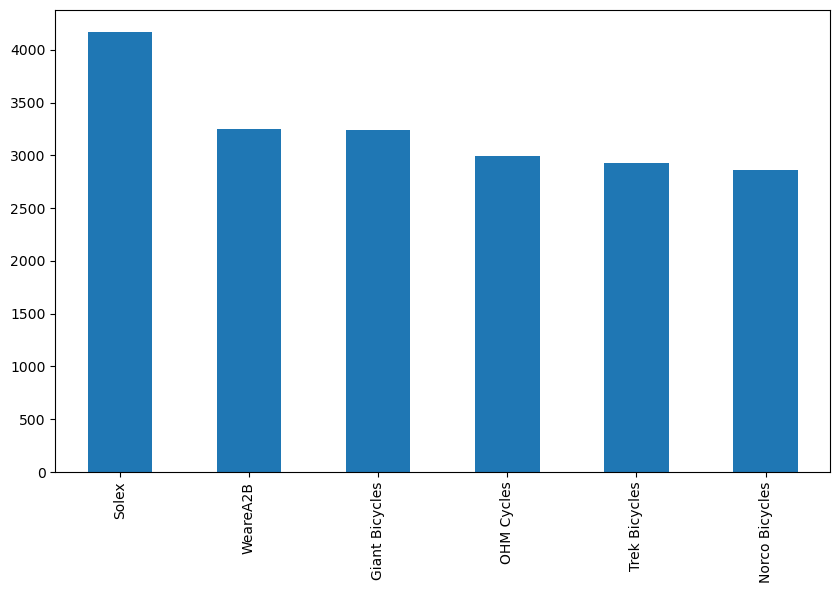

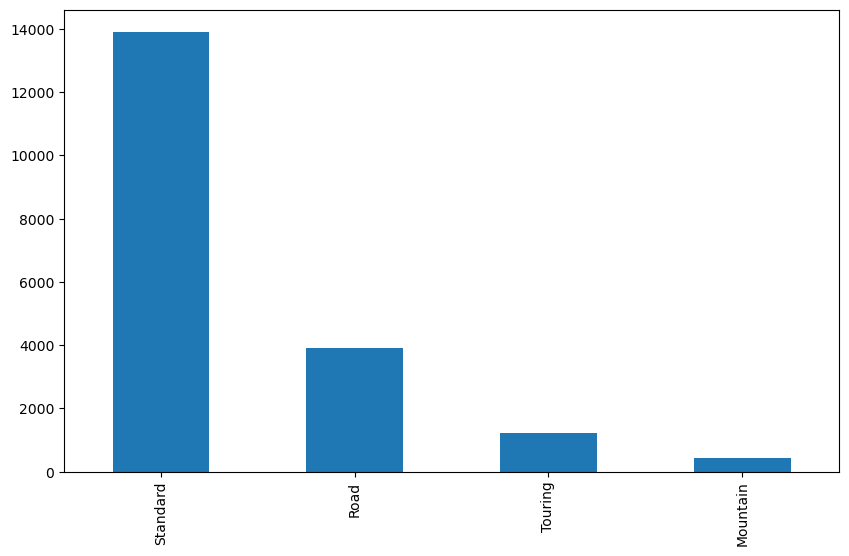

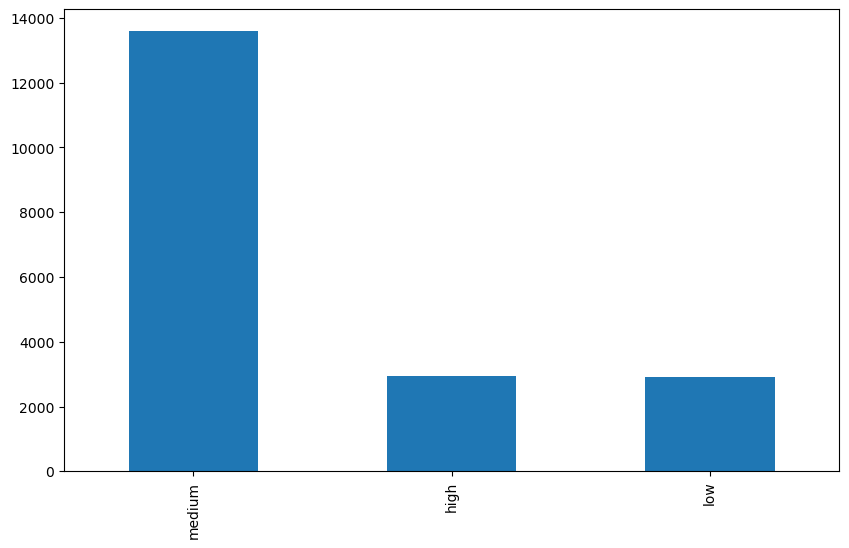

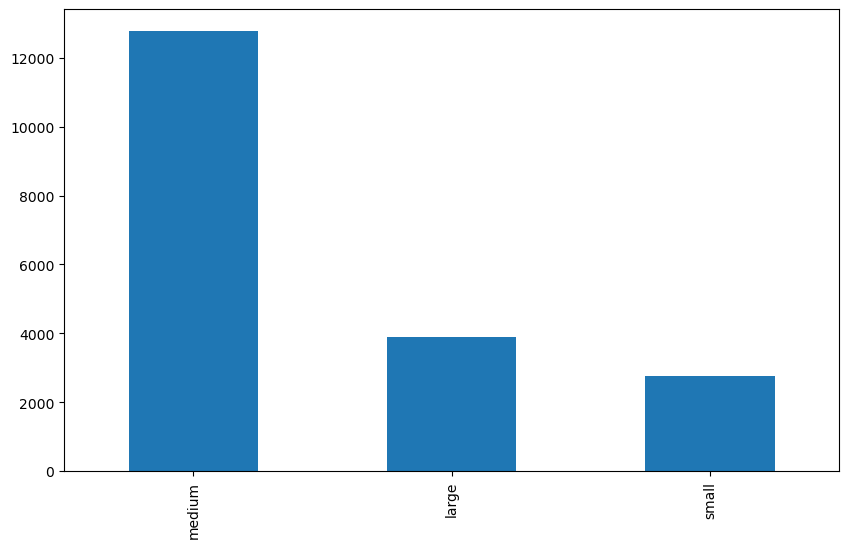

In [38]:
def plot_bar_chart(data, column):
    
    value_counts = data[column].value_counts()
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    
    plt.show()
    
columns_to_plot = ['order_status', 'brand', 'product_line', 'product_class', 'product_size']

for column in columns_to_plot:
    plot_bar_chart(transactions, column)

### Numerical Columns

In [39]:
def count_values_in_columns(dataframe, columns):
    
    counts = {}
    for column in columns:
        counts[column] = dataframe[column].value_counts()
    return counts

columns_to_count = ['online_order', 'list_price', 'standard_cost']

value_counts_dict = count_values_in_columns(transactions, columns_to_count)

for column, counts_series in value_counts_dict.items():
    print(f"Value Counts for '{column}':")
    print(counts_series, end="\n\n")

Value Counts for 'online_order':
1.0    9739
0.0    9706
Name: online_order, dtype: int64

Value Counts for 'list_price':
2091.47    460
1403.50    389
71.49      269
1231.15    232
1890.39    230
          ... 
1172.78    153
358.39     138
1227.34    126
202.62     123
1036.59    111
Name: list_price, Length: 100, dtype: int64

Value Counts for 'standard_cost':
388.920000    460
954.820000    389
53.620000     269
161.600000    232
260.140000    230
             ... 
151.960000    123
206.350000    111
312.735016      1
270.299988      1
667.400024      1
Name: standard_cost, Length: 103, dtype: int64



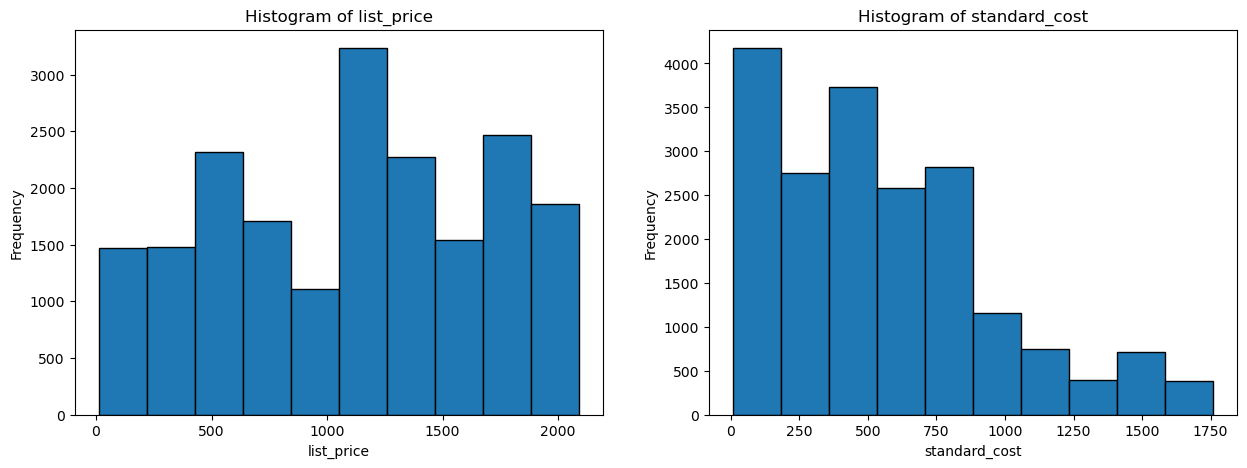

In [40]:
columns_to_plot = ['list_price', 'standard_cost']

fig, axs = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    axs[i].hist(transactions[column], bins=10, edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# plt.tight_layout()

plt.show()

In [68]:
transactions['list_price'].median()

1163.89

In [69]:
transactions['standard_cost'].median()

507.58

## Feature Engineering 

In [41]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [42]:
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,No,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,No,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,No,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,No,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,No,Yes,20.0


In [43]:
transactions_engineering = transactions.copy()

In [44]:
transactions_engineering.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [46]:
categorical_columns = ['brand', 'product_line', 'product_class', 'product_size']

transactions_eng_encoded = pd.get_dummies(transactions_engineering, columns=categorical_columns, drop_first=True)

transactions_eng_encoded['month'] = transactions_eng_encoded['transaction_date'].dt.month
transactions_eng_encoded['day_of_week'] = transactions_eng_encoded['transaction_date'].dt.dayofweek

transactions_eng_encoded['product_first_sold_date'] = pd.to_datetime(transactions_eng_encoded['product_first_sold_date'])
transactions_eng_encoded['product_age'] = (transactions_eng_encoded['transaction_date'] - 
                                           transactions_eng_encoded['product_first_sold_date']).dt.days

transactions_eng_encoded['transaction_amount'] = (transactions_eng_encoded['list_price'] - 
                                                  transactions_eng_encoded['standard_cost'])

transactions_eng_encoded['online_order'] = transactions_eng_encoded['online_order'].astype(int)

transactions_eng_encoded.drop(['transaction_date', 'product_first_sold_date'], axis=1, inplace=True)

In [47]:
transactions_eng_encoded.head()

,transaction_id,product_id,customer_id,online_order,order_status,list_price,standard_cost,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,...,product_line_Standard,product_line_Touring,product_class_low,product_class_medium,product_size_medium,product_size_small,month,day_of_week,product_age,transaction_amount
0,1,2,2950,0,Approved,71.49,53.62,0,0,1,...,1,0,0,1,1,0,2,5,17221,17.87
1,2,3,3120,1,Approved,2091.47,388.92,0,0,0,...,1,0,0,1,0,0,5,6,17306,1702.55
2,3,37,402,0,Approved,1793.43,248.82,0,1,0,...,1,0,1,0,1,0,10,0,17454,1544.61
3,4,88,3135,0,Approved,1198.46,381.10,1,0,0,...,1,0,0,1,1,0,8,3,17408,817.36
4,5,78,787,1,Approved,1765.30,709.48,0,0,0,...,1,0,0,1,0,0,10,6,17439,1055.82


In [52]:
transactions_eng_encoded.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'list_price', 'standard_cost', 'brand_Norco Bicycles',
       'brand_OHM Cycles', 'brand_Solex', 'brand_Trek Bicycles',
       'brand_WeareA2B', 'product_line_Road', 'product_line_Standard',
       'product_line_Touring', 'product_class_low', 'product_class_medium',
       'product_size_medium', 'product_size_small', 'month', 'day_of_week',
       'product_age', 'transaction_amount'],
      dtype='object')

In [59]:
transactions_eng_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         19445 non-null  int64  
 1   product_id             19445 non-null  int64  
 2   customer_id            19445 non-null  int64  
 3   online_order           19445 non-null  int32  
 4   order_status           19445 non-null  object 
 5   list_price             19445 non-null  float64
 6   standard_cost          19445 non-null  float64
 7   brand_Norco Bicycles   19445 non-null  uint8  
 8   brand_OHM Cycles       19445 non-null  uint8  
 9   brand_Solex            19445 non-null  uint8  
 10  brand_Trek Bicycles    19445 non-null  uint8  
 11  brand_WeareA2B         19445 non-null  uint8  
 12  product_line_Road      19445 non-null  uint8  
 13  product_line_Standard  19445 non-null  uint8  
 14  product_line_Touring   19445 non-null  uint8  
 15  pr

In [53]:
transactions_eng_encoded.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,brand_Norco Bicycles,brand_OHM Cycles,brand_Solex,brand_Trek Bicycles,...,product_line_Standard,product_line_Touring,product_class_low,product_class_medium,product_size_medium,product_size_small,month,day_of_week,product_age,transaction_amount
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,...,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,0.500849,1107.337193,555.585260,0.147236,0.153921,0.214400,0.150733,...,0.715865,0.062381,0.149447,0.698740,0.656570,0.142864,6.520082,2.996297,17347.681461,551.751933
std,5779.669087,30.571996,1011.889153,0.500012,582.662400,405.596541,0.354350,0.360883,0.410416,0.357797,...,0.451013,0.241853,0.356538,0.458817,0.474866,0.349944,3.448443,2.006338,105.344154,493.211843
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,17166.000000,4.800000
25%,4976.000000,18.000000,857.000000,0.000000,575.270000,215.140000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,17256.000000,133.780000
50%,9985.000000,45.000000,1741.000000,1.000000,1163.890000,507.580000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,7.000000,3.000000,17349.000000,445.210000
75%,14997.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,10.000000,5.000000,17440.000000,830.240000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,17529.000000,1702.550000


## Data Insight Summary: 

### EDA: 

Key Insight from the Categorical Variables in `Transactions`:
- `Favorite Brand`: Solex is the favorite brand, with over 4,169 transactions, while the other brands have fewer transactions, all below 3,250.
- `Product Line`: The Standard product line stands out with over 13,920 transactions, while the other lines (Road, Touring, Mountain) have significantly fewer transactions, all below 4,000.
- `Product Class`: Medium product class is the most popular, with over 13,587 transactions, while both high and low classes have fewer transactions, each below 4,000.
- `Product Size`: Medium-sized products are in demand, with over 12,767 transactions, while both large and small sizes have lower transaction counts, each below 4,000.

Key insights from the histograms of numerical variables in `Transactions`:

- `List Price`: The histogram of the 'list_price' variable shows a high frequency of transactions in the range of 1,100 to 1,250. This suggests that a significant number of products have list prices within this range.

- `Standard Cost`: The histogram of the 'standard_cost' variable shows a high frequency of transactions in the range of 0 to 200. This indicates that many products have standard costs within this lower cost range.


Key observations from the categorical variables in the 'Demographic' dataset:
- `Gender`: A significant majority of the customers identify as female.
- `Job Industry`: The predominant job industries represented are Manufacturing and Financial Services.
- `Wealth Segment`: The Mass Customer segment overwhelmingly dominates in frequency.
- `Deceased Indicator`: The majority of customers do not indicate a deceased status.
- `Owns Car`: Yes, the majority of customers own a car.

### Feature Engineering: 

As for the feature engineering, we have assing a new column for the analysis in the Model Development section, in summarize we perform feature engineering with hot encoding categorical variables, extracting relevant time-based features, calculationg product age, and transaction amount. 

<br>

## Phase 2: Model Development

## Model Selection

In [58]:
import statsmodels.api as sm 

features = [
    'brand_Norco Bicycles', 
    'brand_OHM Cycles',
    'brand_Solex', 
    'brand_Trek Bicycles',
    'brand_WeareA2B',
    'product_line_Standard',
    'product_line_Road', 
    'product_line_Touring',
#     'product_class_low', 
    'product_class_medium',
    'product_size_medium', 
    'product_size_small',
]

X = sm.add_constant(transactions_eng_encoded[features])
y = np.log(transactions_eng_encoded['transaction_amount'])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     transaction_amount   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     454.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:48:39   Log-Likelihood:                -29837.
No. Observations:               19445   AIC:                         5.970e+04
Df Residuals:                   19433   BIC:                         5.979e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.3242      0.065     82.217      0.000       5.197       5.451
brand_Norco Bicycles     -0.1502      0.029     -5.102      0.000      -0.208      -0.092
brand_OHM Cycles         -0.3894      0.029    -13.256      0.000      -0.447      -0.332
brand_Solex              -0.1085      0.027     -4.088      0.000      -0.161      -0.056
brand_Trek Bicycles       0.2385      0.029      8.148      0.000       0.181       0.296
brand_WeareA2B            0.3480      0.029     11.948      0.000       0.291       0.405
product_line_Standard     0.8556      0.059     14.482      0.000       0.740       0.971
product_line_Road         0.4492      0.060      7.441      0.000       0.331       0.567
product_line_Touring      1.3626      0.070     19.439      0.000       1.225       1.500
product_class_medium      0.1585      0.019      8.408      0.000       0.122       0.195
product_size_medium      -0.4449      0.023    -19.510      0.000      -0.490      -0.400
product_size_small       -1.2696      0.030    -42.220      0.000      -1.329      -1.211
==============================================================================
Omnibus:                     3597.298   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6376.654
Skew:                          -1.188   Prob(JB):                         0.00
Kurtosis:                       4.491   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Data Splitting

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_squared_error as rmse 
from sklearn.metrics import r2_score as r2

features = [
    'brand_Norco Bicycles', 
    'brand_OHM Cycles',
    'brand_Solex', 
    'brand_Trek Bicycles',
    'brand_WeareA2B',
    'product_line_Standard',
    'product_line_Road', 
    'product_line_Touring',
#     'product_class_low', 
    'product_class_medium',
    'product_size_medium', 
    'product_size_small',
]

X = sm.add_constant(transactions_eng_encoded[features])
y = np.log(transactions_eng_encoded['transaction_amount'])

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state= 12345)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state= 12345)

print(
    f"Training Set Rows: {X.shape[0]}",
    f"Validation Set Rows: {X_valid.shape[0]}",
    f"Test Set Row: {X_test.shape[0]}"
)

Training Set Rows: 15556 Validation Set Rows: 3889 Test Set Row: 3889


## Model Tuning

In [63]:
model = sm.OLS(y_train, X_train).fit()

print(f'Training R2: {r2(y_train, model.predict(X_train))}')
print(f'Validation R2: {r2(y_valid, model.predict(X_valid))}')

Training R2: 0.21172100666970373
Validation R2: 0.19552126481493803


In [64]:
print(f"Train R2: {r2(y_train, model.predict(X_train))}")
print(f"Train MAE: {mae(y_train, model.predict(X_train))}")
print(f"Validation R2: {r2(y_valid, model.predict(X_valid))}")
print(f"Validation MAE: {mae(y_valid, model.predict(X_valid))}")

Train R2: 0.21172100666970373
Train MAE: 0.8409931398803604
Validation R2: 0.19552126481493803
Validation MAE: 0.848596922651104


## Model Scoring

In [65]:
# Final Test 
model = sm.OLS(y, X).fit()

print(f'Training R2: {r2(y, model.predict(X))}')
print(f'Test R2: {r2(y_test, model.predict(X_test))}')

Training R2: 0.20782732941514648
Test R2: 0.19212667096648206


In [66]:
model = sm.OLS(y_test, X_test).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     transaction_amount   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     84.10
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          5.01e-171
Time:                        16:02:47   Log-Likelihood:                -6056.9
No. Observations:                3889   AIC:                         1.214e+04
Df Residuals:                    3877   BIC:                         1.221e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.2115      0.150     34.715      0.000       4.917       5.506
brand_Norco Bicycles     -0.1617      0.066     -2.445      0.015      -0.291      -0.032
brand_OHM Cycles         -0.3774      0.066     -5.732      0.000      -0.506      -0.248
brand_Solex              -0.0971      0.061     -1.584      0.113      -0.217       0.023
brand_Trek Bicycles       0.2589      0.067      3.857      0.000       0.127       0.390
brand_WeareA2B            0.3438      0.067      5.095      0.000       0.212       0.476
product_line_Standard     0.9110      0.138      6.622      0.000       0.641       1.181
product_line_Road         0.5221      0.141      3.693      0.000       0.245       0.799
product_line_Touring      1.4338      0.162      8.828      0.000       1.115       1.752
product_class_medium      0.1924      0.043      4.489      0.000       0.108       0.276
product_size_medium      -0.4198      0.052     -8.083      0.000      -0.522      -0.318
product_size_small       -1.2327      0.068    -18.145      0.000      -1.366      -1.099
==============================================================================
Omnibus:                      705.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1215.057
Skew:                          -1.174   Prob(JB):                    1.42e-264
Kurtosis:                       4.409   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cross-Validation Loop

In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2


kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = sm.OLS(y_train, X_train).fit()
    # Append Validation score to list 
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.2, 0.21, 0.205, 0.209, 0.211]
Cross Val R2s: 0.207 +- 0.004
All Validation MAEs:  [0.851, 0.84, 0.841, 0.845, 0.843]
Cross Val MAEs: 0.844 +- 0.004


## Result Interpretation

After performing the model fitting, data spliting, model training evaluation. Our original training model suggest that the model explains approximately `20.5%` of the variance in the dependent variable, and the `79.5%` of the variability is not explained by the model. 

In summary, an R-squared of 0.205 indicates a moderate level of explanatory power but also suggests that there is room for improvement in capturing the underlying relationships in the data.

<br>

# Phase 3

## Interpretation & Reporting

## Result Interpretation

With the analysis we perform above, the customer segments that bring up the high potential value is: 
- `Brand`: Solex brand, this brand has over 4,169 transactions while the other have fewer transaction below 3,250. 
- `Product Line`: Standard product line is most stand out product line over all other line (Road, Touring, and Mountain) that has a significant distance than the Standard product line, with all below 4,000 transaction by each product line. 
- `Product Class`: Medium product class is the most popular product class with over 13,587 while the high and low class have low transaction each of them are below 4,000.
 - `Product Size`: Most of our customers showing the big indicator of Medium-sized products, with over 12,767 transaction while both of large and small sizes are below 4,000 transaction 

Customer Demographic insights: 
- `Gender`: The majority of our customers are Female with the lowes amount of male buyers of 1,333 than the female by over 1,4466.
- `Job Industry`: Manufacturing, and Financial Services job industries are the most occuring job industries our customers come from. 
- `Wealht Segment`: The Mass Customer are the most overwhelmingly segment of customers in the frequency counts. 
- `Deceased Indicator`: Most of our customers do not indicate a deceased status, and shows only small portion of deceased with only 2 person who has a record of having a disease. 
- `Owns Car`: The vast majority of our customers is indeed own a car. 
    
With The Interpretation above, clearly we can boost our focus on those customer segment from the `Customer Transaction Behavior` and `Customer Demographic`.